# Logistic Regression For Price Classification
### predict the classification of house above or below the medain house value 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# set_option to format our numeric values
# pd.set_option('display.precision',2) # precison mean the numbers after the dicemal number

# reset all options, *** ignore the warning that may appear ***
#pd.reset_option('all')

housing_data=pd.read_csv('housing.csv')

housing_data.sample(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
13783,-117.06,34.03,27.0,1945.0,446.0,859.0,418.0,1.5203,126200.0,INLAND
1706,-122.32,37.95,37.0,1887.0,353.0,895.0,359.0,4.4500,196600.0,NEAR BAY
8385,-118.36,33.98,45.0,1559.0,305.0,891.0,341.0,4.4038,259400.0,<1H OCEAN
7753,-118.11,33.91,19.0,3056.0,759.0,1561.0,740.0,3.1369,196900.0,<1H OCEAN
16120,-122.46,37.78,52.0,2594.0,622.0,1421.0,593.0,3.0265,350000.0,NEAR BAY


# Data preparation

In [2]:
housing_data.shape

(20640, 10)

In [3]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
# drop of fix null values, here wil just drop all rows with nulls
housing_data=housing_data.dropna()
housing_data.shape

(20433, 10)

In [5]:
# check to see if this field is a categorical field
housing_data['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [6]:
# convert the categorical columns to numeric data, this will add 4 new columns and remove the orignal column
housing_data=pd.get_dummies(housing_data,columns=['ocean_proximity']) # this step call one-hot encoding
housing_data.shape

(20433, 14)

In [7]:
housing_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0


[Text(0, 0, 'longitude'),
 Text(1, 0, 'latitude'),
 Text(2, 0, 'housing_median_age'),
 Text(3, 0, 'total_rooms'),
 Text(4, 0, 'total_bedrooms'),
 Text(5, 0, 'population'),
 Text(6, 0, 'households'),
 Text(7, 0, 'median_income'),
 Text(8, 0, 'median_house_value'),
 Text(9, 0, 'ocean_proximity_<1H OCEAN'),
 Text(10, 0, 'ocean_proximity_INLAND'),
 Text(11, 0, 'ocean_proximity_ISLAND'),
 Text(12, 0, 'ocean_proximity_NEAR BAY'),
 Text(13, 0, 'ocean_proximity_NEAR OCEAN'),
 Text(14, 0, 'above_median')]

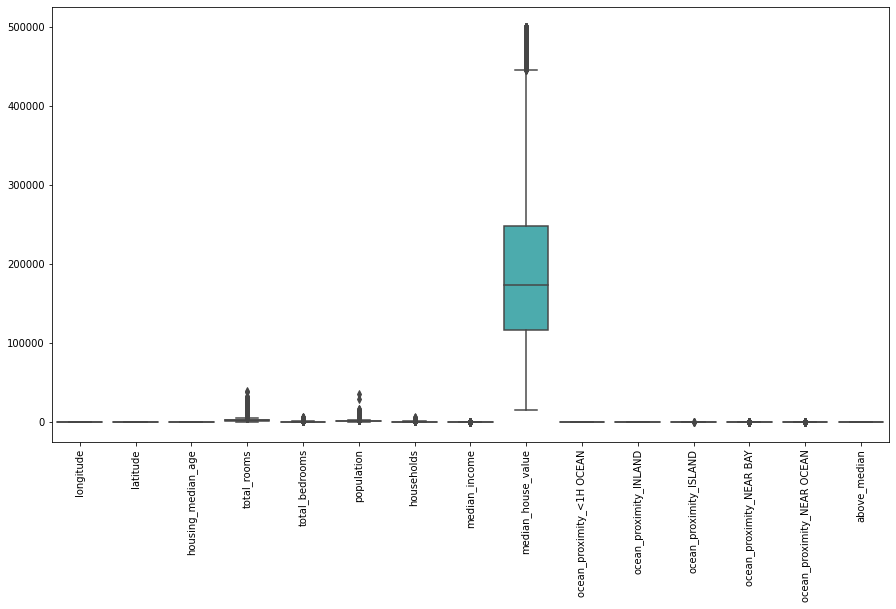

In [31]:
#we need to find out if there is any outliers i our data
# will draw boxplot for all columns
fig,ax=plt.subplots(figsize=(15,8))
bp=sns.boxplot(data=housing_data)
bp.set_xticklabels(bp.get_xticklabels(),rotation=90) # label rotation 

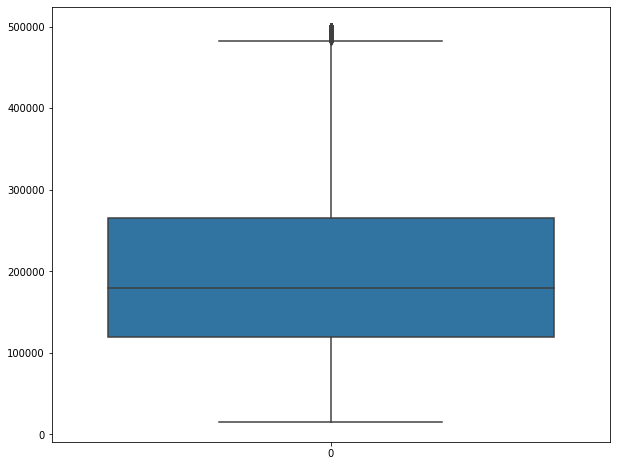

In [9]:
# will draw boxplot for all columns
fig,ax=plt.subplots(figsize=(10,8))
bp=sns.boxplot(data=housing_data['median_house_value'])

In [10]:
# now we need to find out the max of 'median_house_value' to remove the outliers
housing_data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155,0.442128,0.317917,0.000245,0.111095,0.128615
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099,0.496652,0.465678,0.015641,0.314257,0.334782
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
# filter the data using loc and get the count
housing_data.loc[housing_data['median_house_value']==500001].count()
# 958 rows of data could skewness يحرف our training model result, so it is better to drop

longitude                     958
latitude                      958
housing_median_age            958
total_rooms                   958
total_bedrooms                958
population                    958
households                    958
median_income                 958
median_house_value            958
ocean_proximity_<1H OCEAN     958
ocean_proximity_INLAND        958
ocean_proximity_ISLAND        958
ocean_proximity_NEAR BAY      958
ocean_proximity_NEAR OCEAN    958
dtype: int64

In [12]:
# housing_data.drop(rows or columns indexies)
housing_data=housing_data.drop(housing_data.loc[housing_data['median_house_value']==500001].index)
housing_data.shape

(19475, 14)

# Train our model - spliting data

In [13]:
# we need to convert our data to be classification (LogisticRegression)
# will get the median and compare to see if price below or above the median
median=housing_data['median_house_value'].median()
median

173800.0

In [14]:
# will add new column call above_median 
housing_data['above_median']=(housing_data['median_house_value']-median)>0
housing_data.sample(5)
# we see blow if the price is below median (179700.0) will be False otherwaise will be True

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,above_median
7426,-118.20,33.95,35.0,1924.0,520.0,2101.0,541.0,2.4267,151500.0,1,0,0,0,0,False
4930,-118.25,33.99,42.0,2261.0,574.0,2496.0,527.0,1.5556,98500.0,1,0,0,0,0,False
7913,-118.08,33.88,27.0,923.0,186.0,1014.0,204.0,3.8250,159500.0,1,0,0,0,0,False
10226,-117.88,33.87,35.0,1919.0,349.0,1302.0,345.0,5.6409,190900.0,1,0,0,0,0,True
11975,-117.43,33.99,18.0,3307.0,547.0,1738.0,457.0,4.5660,116900.0,0,1,0,0,0,False


In [15]:
# now we need to get two sets of data 
# x for train (features) and y for prediction (target)
# since we need to predict the median_house_value, so we need to drop it from our train data
X=housing_data.drop(['median_house_value','above_median'],axis=1) # axis=0 => rows and axis=1 => columns 
Y=housing_data['above_median'] # our output will be True or False (classification)

In [16]:
X.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'],
      dtype='object')

In [17]:
# we use the train data to train our model, and later will use the test data to measure the performance of ML model.
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)

In [18]:
x_train.shape,x_test.shape

((15580, 13), (3895, 13))

In [19]:
y_train.shape,y_test.shape

((15580,), (3895,))

# Apply LogisticRegression

Normalization scales all numersic features to be between 0 and 1.

Note: Having features in the same scale can vastly improve the performance of your ML model.

fit=Fit the linear model on the training data i.e. train the linear model using our features and target values.

In [20]:
from sklearn.linear_model import LogisticRegression
# the liblinear solver is a good choice for samll dataset and binary classification
logistic_model=LogisticRegression(solver='liblinear').fit(x_train,y_train)

# evaluation training score

print the evaluation score, this shown how well our linear model capture the underlying variation in our training data

In [21]:
print("Training_score :",logistic_model.score(x_train,y_train))
#0.6144045851306654 it is not fantastic but not bad

Training_score : 0.8188703465982028


In [22]:
predictors=x_train.columns
predictors

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'],
      dtype='object')

In [24]:
# let us predict using the x_test 
y_pred=logistic_model.predict(x_test)

In [25]:
# to take a look on our model prediction using our eyes 
#we want to compare between our actual data and predicted data
df_pred_actual=pd.DataFrame({'predicted':y_pred,'actual':y_test})
df_pred_actual.head(10)

,predicted,actual
5093,False,False
499,False,False
4565,False,False
5546,True,True
12194,True,False
5165,False,False
11168,True,True
8298,True,True
18013,True,True
12425,False,False


# evaluate the accuracy for our test data - using accuracy_score

In [26]:
from sklearn.metrics import accuracy_score
print('Testing_score :',accuracy_score(y_test,y_pred)) 
# we can see the score about 82%, that mean 82% of our model predication is correct

Testing_score : 0.824390243902439


In [30]:
# here we can't plot our prediction because it is just True/False values